# Fall 2022 Data Science Intern Challenge - Conor Kennedy

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation.<br>
Think about a better way to evaluate this data. <br>
What metric would you report for this dataset?<br>
What is its value?


In [173]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

## Understanding the data

In [175]:
df.shape

(5000, 7)

In [176]:
print("The first five rows are:")
df.head()

The first five rows are:


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [177]:
print("The last five rows are:")
df.tail()

The last five rows are:


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


In [178]:
df.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [179]:
df.nunique()

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64

## Changing Features to appropriate data type

In [180]:
#setting the data type to 'category'.

category_columns = ["order_id", "shop_id", "user_id", "payment_method"]
for column in category_columns :
    df[column] = df[column].astype('category')   #setting the columns in list as category type

In [181]:
#Changing 'created_at' column to data type datetime[ns].
df['created_at'] = df['created_at'].astype('datetime64[ns]')

In [182]:
#checking to see change has been made.
df.dtypes

order_id                category
shop_id                 category
user_id                 category
order_amount               int64
total_items                int64
payment_method          category
created_at        datetime64[ns]
dtype: object

## Checking for Duplicate Rows & Columns

In [183]:
#checking for duplicates
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())  

Number of duplicate (excluding first) rows in the table is:  0


In [184]:
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


#### Result: There are no duplicate columns or rows. No changes to the CSV file are needed based on duplicates.

## Looking for constant columns

In [185]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
order_id,5000,5000,1,1
shop_id,5000,100,53,68
user_id,5000,301,718,28
payment_method,5000,3,credit_card,1735


#### Result: As the unique column's values are greater than 1, there are no constant columns.

In [186]:
# Print table with continuous statistics
df.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
order_amount,5000.0,3145.1280,41282.539349,90.0,163.0,284.0,390.0,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.0,2.0,3.0,2000.0


In [187]:
df['order_amount'].mean()

3145.128

In [188]:
df['order_amount'].median()

284.0

The high mean value compared to the median value is due to outliers in the data bringing the price up with regards to the mean. The median on the other hand is not affected by outliers.

In [189]:
DateTime_columns = df.select_dtypes(['datetime64[ns]']).columns
df[DateTime_columns].describe().T

<ipython-input-189-8c6c071394c0>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[DateTime_columns].describe().T


,count,unique,top,freq,first,last
created_at,5000,4991,2017-03-28 04:00:00,3,2017-03-01 00:08:09,2017-03-30 23:55:35


#### Can see that the data is over a 30 day window as described in the assignment briefing so no rows need to be dropped

## Checking for any null values 

In [190]:
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

# Investigating the price field

In [191]:
# Creating a new column
df['price_per_shoe'] = df['order_amount']/df['total_items']

In [192]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_shoe
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0


In [193]:
#reordering the columns 
df = df[["order_id", "shop_id", "user_id", "order_amount", "total_items", "price_per_shoe", "payment_method", "created_at"]]

In [194]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,price_per_shoe,payment_method,created_at
0,1,53,746,224,2,112.0,cash,2017-03-13 12:36:56
1,2,92,925,90,1,90.0,cash,2017-03-03 17:38:52
2,3,44,861,144,1,144.0,cash,2017-03-14 04:23:56
3,4,18,935,156,1,156.0,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,156.0,credit_card,2017-03-01 04:35:11


In [195]:
#checking to see change has been made.
df.dtypes

order_id                category
shop_id                 category
user_id                 category
order_amount               int64
total_items                int64
price_per_shoe           float64
payment_method          category
created_at        datetime64[ns]
dtype: object

In [196]:
pd.DataFrame(df['price_per_shoe'].describe())

,price_per_shoe
count,5000.000000
mean,387.742800
std,2441.963725
min,90.000000
25%,133.000000
50%,153.000000
75%,169.000000
max,25725.000000


In [197]:
# Clearly there is an issue here - shoes being sold for 25,725 does not make sense?

In [198]:
mean_prices = [(df[df['shop_id'] == shop]['price_per_shoe'].mean()) for shop in df['shop_id'].unique()]

/Users/conorkennedy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Median Residential Property Price'>

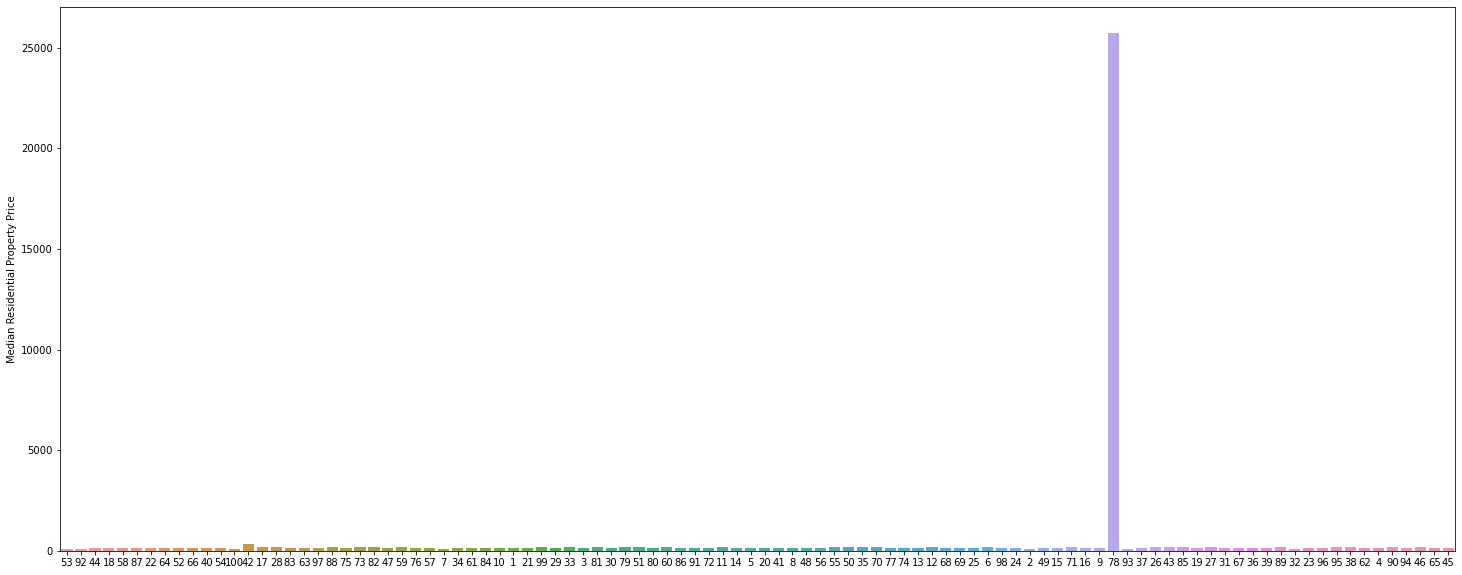

In [199]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.ylabel('Median Residential Property Price')
sns.barplot(df['shop_id'].unique(), mean_prices)

In [200]:
outliers = df[df['price_per_shoe'] > 500]

In [201]:
outliers

,order_id,shop_id,user_id,order_amount,total_items,price_per_shoe,payment_method,created_at
160,161,78,990,25725,1,25725.0,credit_card,2017-03-12 05:56:57
490,491,78,936,51450,2,25725.0,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,25725.0,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,25725.0,cash,2017-03-09 07:23:14
617,618,78,760,51450,2,25725.0,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,25725.0,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,25725.0,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,25725.0,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,25725.0,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,25725.0,credit_card,2017-03-27 09:27:20


In [202]:
outliers.select_dtypes(['category']).describe().T

,count,unique,top,freq
order_id,46,46,494,1
shop_id,46,1,78,46
user_id,46,45,855,2
payment_method,46,3,cash,18


In [203]:
outliers.describe()

,order_amount,total_items,price_per_shoe
count,46.000000,46.000000,46.0
mean,49213.043478,1.913043,25725.0
std,26472.227449,1.029047,0.0
min,25725.000000,1.000000,25725.0
25%,25725.000000,1.000000,25725.0
50%,51450.000000,2.000000,25725.0
75%,51450.000000,2.000000,25725.0
max,154350.000000,6.000000,25725.0


In [204]:
shop_78_less_than_500 = df[df['price_per_shoe'] < 500]
shop_78_less_than_500 = df[df['shop_id'] == '78']

In [205]:
shop_78_less_than_500.shape

(0, 8)

### Therefore, as all of shop id 78's price per item is 25,725 - this shop should be looked into for fraud. 

### Further investigation - looking at order amount

In [206]:
mean_prices = [(df[df['shop_id'] == shop]['order_amount'].mean()) for shop in df['shop_id'].unique()]

/Users/conorkennedy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Mean order amount'>

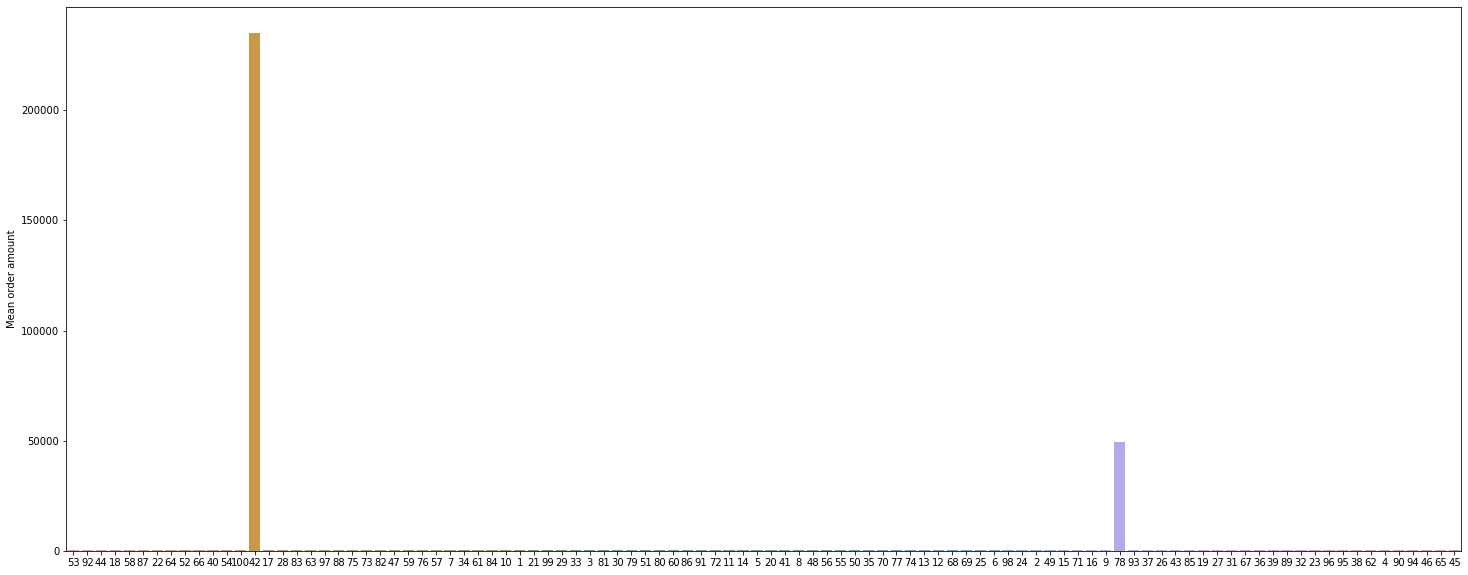

In [207]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.ylabel('Mean order amount')
sns.barplot(df['shop_id'].unique(), mean_prices)

In [208]:
### Lets look into shop_id 42

In [209]:
shop_42 = df[df['shop_id'] == 42]

In [210]:
shop_42

,order_id,shop_id,user_id,order_amount,total_items,price_per_shoe,payment_method,created_at
15,16,42,607,704000,2000,352.0,credit_card,2017-03-07 04:00:00
40,41,42,793,352,1,352.0,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,352.0,credit_card,2017-03-04 04:00:00
308,309,42,770,352,1,352.0,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,352.0,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,352.0,credit_card,2017-03-02 04:00:00
834,835,42,792,352,1,352.0,cash,2017-03-25 21:31:25
835,836,42,819,704,2,352.0,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,352.0,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,352.0,debit,2017-03-12 13:09:04


In [211]:
pd.DataFrame(shop_42['order_amount'].describe())

,order_amount
count,51.000000
mean,235101.490196
std,334860.641587
min,352.000000
25%,352.000000
50%,704.000000
75%,704000.000000
max,704000.000000


### Looking into the orders that were valued over 704000

In [212]:
shop_42 = shop_42[shop_42['order_amount'] > 10000]

In [213]:
shop_42

,order_id,shop_id,user_id,order_amount,total_items,price_per_shoe,payment_method,created_at
15,16,42,607,704000,2000,352.0,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,352.0,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,352.0,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,352.0,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,352.0,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,352.0,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,352.0,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,352.0,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,352.0,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,352.0,credit_card,2017-03-07 04:00:00


### Lets see if user 607 purchased from any other shop

In [214]:
user_607 = df[df['user_id'] == 607]

In [215]:
user_607

,order_id,shop_id,user_id,order_amount,total_items,price_per_shoe,payment_method,created_at
15,16,42,607,704000,2000,352.0,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,352.0,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,352.0,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,352.0,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,352.0,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,352.0,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,352.0,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,352.0,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,352.0,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,352.0,credit_card,2017-03-07 04:00:00


In [216]:
user_607['order_amount'].sum()

11968000

In [217]:
user_607.shape

(17, 8)

### This should be looked into for fraud

### The decision has been made to drop user_607 and shop_id 78

In [218]:
#dropping user id 607
df.drop(df.loc[df['user_id']== 607].index, inplace=True)

In [219]:
#dropping shop id 78
df.drop(df.loc[df['shop_id']== 78].index, inplace=True)

In [220]:
mean_prices = [(df[df['shop_id'] == shop]['order_amount'].mean()) for shop in df['shop_id'].unique()]

/Users/conorkennedy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Mean order amount'>

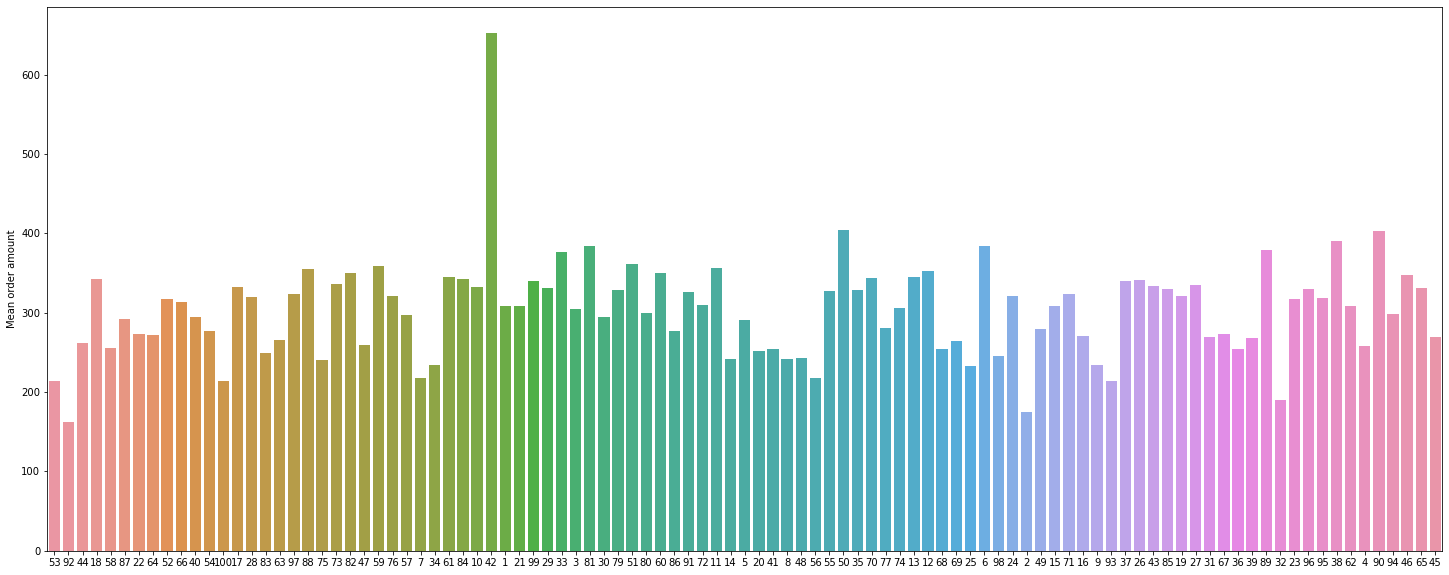

In [221]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.ylabel('Mean order amount')
sns.barplot(df['shop_id'].unique(), mean_prices)

In [222]:
shop_42 = df[df['shop_id'] == 42]

In [223]:
shop_42

,order_id,shop_id,user_id,order_amount,total_items,price_per_shoe,payment_method,created_at
40,41,42,793,352,1,352.0,credit_card,2017-03-24 14:15:41
308,309,42,770,352,1,352.0,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,352.0,credit_card,2017-03-04 14:32:58
834,835,42,792,352,1,352.0,cash,2017-03-25 21:31:25
835,836,42,819,704,2,352.0,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,352.0,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,352.0,debit,2017-03-12 13:09:04
1364,1365,42,797,1760,5,352.0,cash,2017-03-10 06:28:21
1367,1368,42,926,1408,4,352.0,cash,2017-03-13 02:38:34
1471,1472,42,907,1408,4,352.0,debit,2017-03-12 23:00:22


In [224]:
shop_42.describe()

,order_amount,total_items,price_per_shoe
count,34.000000,34.000000,34.0
mean,652.235294,1.852941,352.0
std,358.681682,1.018982,0.0
min,352.000000,1.000000,352.0
25%,352.000000,1.000000,352.0
50%,704.000000,2.000000,352.0
75%,704.000000,2.000000,352.0
max,1760.000000,5.000000,352.0


In [225]:
mean_order_amount = df['order_amount'].mean()

print("Mean order amount when excluding orders suspected of fraud: €" + str(round(mean_order_amount, 2)))

Mean order amount when excluding orders suspected of fraud: €302.58


In [227]:
median_order_amount = df['order_amount'].median()

print("Median order amount when excluding orders suspected of fraud: €" + str(round(median_order_amount, 2)))

Median order amount when excluding orders suspected of fraud: €284.0


### Answering the questions:

Think about what could be going wrong with our calculation.
<br>
- Clearly there are outliers in the data bringing the price up. Order amounts of €704000 from user '607' took place seventeen over the course of the 30 days. This is a total of €11,968,000 from one user in shop id 42. The data related to this user has been dropped and should be investigated for fraud. 
- Furthermore, shop id 78 shoes sell for €25,725. This is unrealistic for a price of a shoe and should also be looked into for fraud. The data for shop id 78 has also been dropped. 

<br>
Think about a better way to evaluate this data.<br>
- A better way to evaluate this data is to remove the outliers as discusses above.<br>
What metric would you report for this dataset?<br>
- The median is an option as it is not affected by outliers<br>
What is its value?<br>
- €284

#### Values after the outliers have been removed:<br>
- Mean Order Value: €302.58<br>
- Median Order Value: €284.0<br>
- These figures are much more closely aligned than they were before there was outliers included in the data.